In [4]:
import torch 
import pandas as pd
import numpy as np
from nltk.tokenize import TweetTokenizer
import scipy

In [39]:
js = scipy.spatial.distance.jensenshannon

imdb = pd.read_csv('../own_data/imdb_data/Train.csv').rename(columns={'text':'reviewText', 'label' : 'sentiment'})
twitter = pd.read_csv('../own_data/reddit_twitter_data/Twitter_Data.csv').rename(columns={'clean_text':'reviewText', 'category' : 'sentiment'})
reddit = pd.read_csv('../own_data/reddit_twitter_data/Reddit_Data.csv').rename(columns={'clean_comment':'reviewText', 'category' : 'sentiment'})
vac = pd.read_csv('../own_data/vac_data/covid-19_vaccine_tweets_with_sentiment.csv')#.rename(columns={'clean_comment':'reviewText', 'category' : 'sentiment'})
twitter['sentiment'].replace({0:'null',-1:0},inplace=True)
reddit['sentiment'].replace({0:'null',-1:0},inplace=True)
twitter = twitter.drop(twitter[twitter.sentiment == 'null'].index)
reddit = reddit.drop(reddit[reddit.sentiment == 'null'].index)
twitter.name = 'twitter'
reddit.name = 'reddit'
imdb.name = 'imdb'
for dataset in [twitter, reddit, imdb]:
    dataset.to_csv(f'../own_data/Cleaned_data/{dataset.name}.csv')


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 95: invalid start byte

In [ ]:
vac

In [34]:
imdb_text = imdb[:,0]
imdb_labels = imdb[:,1]
twitter_text = twitter[:,0]
twitter_labels = twitter[:,1]
reddit_text = reddit[:,0]
reddit_labels = reddit[:,1]


InvalidIndexError: (slice(None, None, None), 0)

In [142]:
datasets = [imdb_text, twitter_text, reddit_text]

In [143]:
w2idx = {}
idx2w = {}
tokenizer = TweetTokenizer()
bruh = {}
wc = 0
for idx, data_text in enumerate(datasets):
    word_counts = [0 for i in range(1000000)]
    for line_idx, line in enumerate(data_text):
        if type(line) == str:
            for word in tokenizer.tokenize(line):
                if word not in w2idx:
                    w2idx[word] = wc
                    idx2w[wc] = word
                    word_counts[wc] = 1
                    wc+=1
                else:
                    try: 
                        word_counts[w2idx[word]] += 1
                    except:
                        pass
    bruh[idx] = word_counts



In [95]:
l = [0 for i in range(10)]

['balls', 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [144]:
x = np.array(bruh[0])
y = np.array(bruh[1])
z = np.array(bruh[2])

In [145]:
softmax_twitter = np.exp(x)/np.sum(np.exp(x))
softmax_imdb = np.exp(y)/np.sum(np.exp(y))

print(js(x,y))
print(js(x,z))
print(js(y,z))

0.5772836680167786
0.5380049453115986
0.3123706367843658


/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_63339/1427131570.py:1: RuntimeWarning: overflow encountered in exp
  softmax_twitter = np.exp(x)/np.sum(np.exp(x))
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_63339/1427131570.py:1: RuntimeWarning: invalid value encountered in true_divide
  softmax_twitter = np.exp(x)/np.sum(np.exp(x))
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_63339/1427131570.py:2: RuntimeWarning: overflow encountered in exp
  softmax_imdb = np.exp(y)/np.sum(np.exp(y))
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_63339/1427131570.py:2: RuntimeWarning: invalid value encountered in true_divide
  softmax_imdb = np.exp(y)/np.sum(np.exp(y))


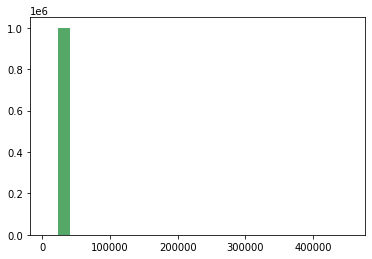

array([115857,    367,  19366,  55512,    298, 444288,     65,  55728,
         6928, 247764,    436, 458761,     55,   3192,  16422,    100,
        34748,   2408,   3553,   2870,   4090, 105605,   6341, 435725,
         3197,     89,   9340,  33270,   2138, 211189,  42007,     20,
        27582,    786,   2593,  37568,    451,      4,   5518,  31076,
         1597,   1063,  33130,   1619,   1158,   1784,   1959,  17503,
        67822,    618,  28504,  19028,  14325, 247827,    233, 228184,
        19456,   2217,  68096,   1627,   1865,     33,    628,  71260,
        17701,   2669,   4649,  75917,     65,   1217,    230,   3150,
       106460, 105811,  11995,    491,  67711,   4930,   1636,    128,
         2412,    333,     12,   1313,    453,   7844,   3459,     69,
         4999,     32,    303,  43479,   2977,    867,      1,      9,
         7581,   1608, 138400,    910])

In [137]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
plt.hist([x,y])
plt.show()
x

In [135]:
x = x[:100]

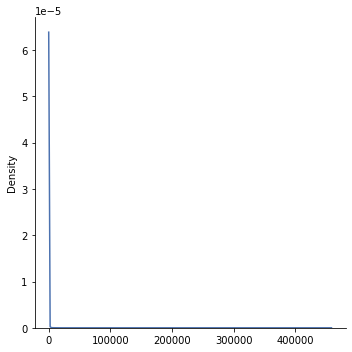

In [139]:
import seaborn as sns
sns.displot(x,kind ='kde')